In [48]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [49]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# dataset info

In [50]:
bc.target[0]

0

In [51]:
bc.target.shape

(569,)

In [52]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [53]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

# preprocessing

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [55]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [56]:
x_train[0]

array([2.059e+01, 2.124e+01, 1.378e+02, 1.320e+03, 1.085e-01, 1.644e-01,
       2.188e-01, 1.121e-01, 1.848e-01, 6.222e-02, 5.904e-01, 1.216e+00,
       4.206e+00, 7.509e+01, 6.666e-03, 2.791e-02, 4.062e-02, 1.479e-02,
       1.117e-02, 3.727e-03, 2.386e+01, 3.076e+01, 1.632e+02, 1.760e+03,
       1.464e-01, 3.597e-01, 5.179e-01, 2.113e-01, 2.480e-01, 8.999e-02])

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
x_train[0]

array([0.63171556, 0.38992222, 0.63919727, 0.49326354, 0.55955712,
       0.44481934, 0.5126523 , 0.55715706, 0.3979798 , 0.25381356,
       0.17255129, 0.18913543, 0.16194374, 0.12680906, 0.22912523,
       0.19270286, 0.10257576, 0.2801667 , 0.04626555, 0.09611697,
       0.5548571 , 0.49946695, 0.55264094, 0.38120286, 0.4967972 ,
       0.32250585, 0.44264957, 0.72611684, 0.18036665, 0.22924046])

# classifacation

# 1. Naive bayes

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")

    return acc_train, acc_test, p, r

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [61]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9406593406593406 - acc test: 0.9210526315789473 - precision: 0.8987341772151899 - recall: 0.9861111111111112


# 2. KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree", leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [63]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9736263736263736 - acc test: 0.9473684210526315 - precision: 0.9459459459459459 - recall: 0.9722222222222222


# 3.desision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion="entropy")
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [68]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9978021978021978 - acc test: 0.8947368421052632 - precision: 0.9166666666666666 - recall: 0.9166666666666666


# 4.Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [72]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9912087912087912 - acc test: 0.9736842105263158 - precision: 0.96 - recall: 1.0


# 5.SVM

In [75]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [76]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869 - acc test: 0.956140350877193 - precision: 0.958904109589041 - recall: 0.9722222222222222


# 7.Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [79]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9758241758241758 - acc test: 0.9210526315789473 - precision: 0.8987341772151899 - recall: 0.9861111111111112


# 7.ANN

In [84]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation="relu", solver="adam")
ann.fit(x_train, y_train)

/home/ahmadkybora/App/python/Breast_Cancer_Diagnosis/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [85]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9912087912087912 - acc test: 0.956140350877193 - precision: 0.9466666666666667 - recall: 0.9861111111111112


# Comparison

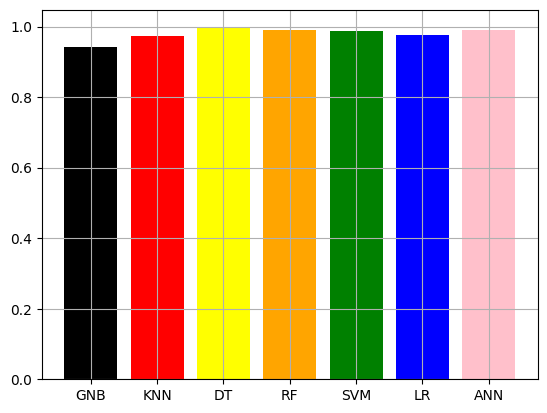

In [94]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

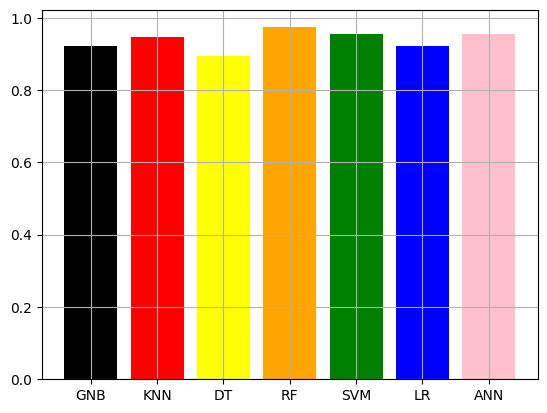

In [95]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

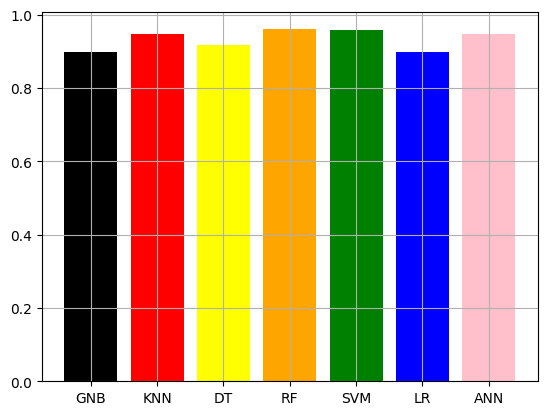

In [96]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

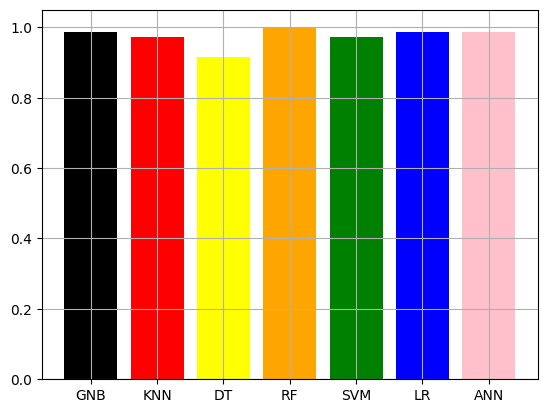

In [97]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]

plt.bar(title, r, color=colors)
plt.grid()
plt.show()